Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4245
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3457
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2848
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.2331
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.1929
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1653
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.1478
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.1376
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.1310
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.1258
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1211
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.1167
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1124
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1082
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - l

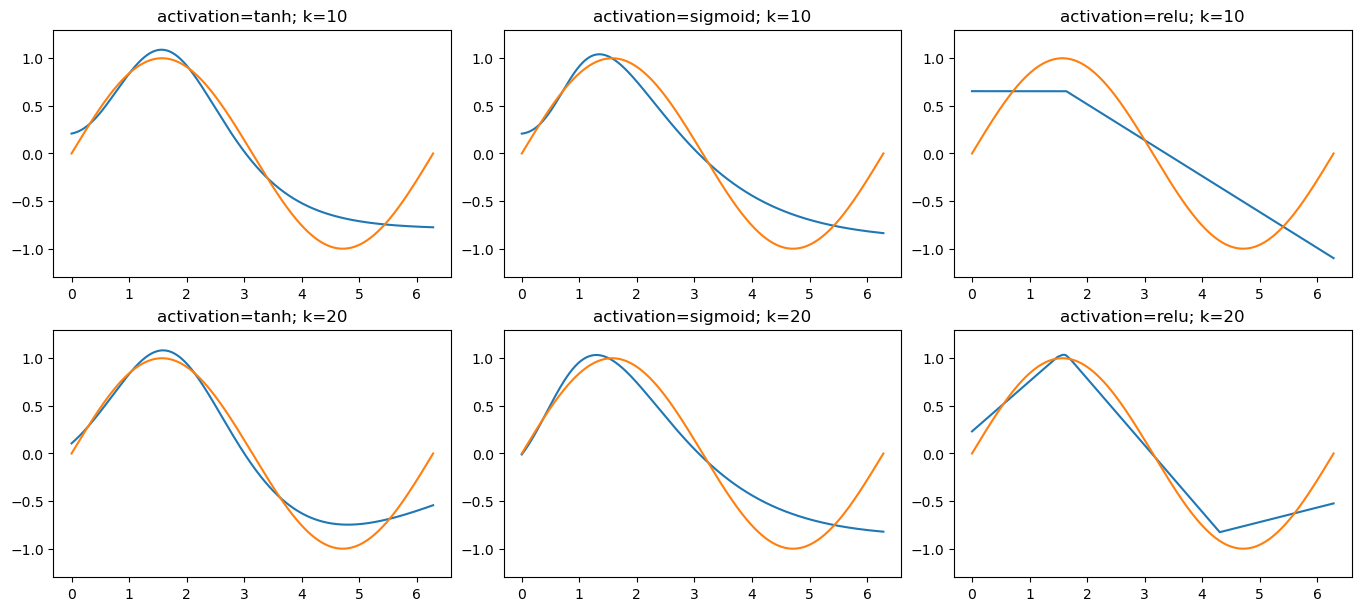

In [28]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf
#tf.random.set_seed(50)

#from matplotlib.ticker import FormatStrFormatter

# specify the sample size
sample = 4000

# specify the hyperparameters of the neural networks, activation functions list and sizes list of the hidden layer (neurons)
activations = ['tanh', 'sigmoid', 'relu']
hidden_size = [10, 20]

# specify the hyperparameter for training the neural networks
batch_size = 128
epochs = 100

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(13.5, 6),
                        layout="constrained")

# The sample is interval in [0, 2*pi]
x = np.linspace(0, 2*np.pi, sample)
# Take sinus
y = np.sin(x)

counter = 0
for n in hidden_size:
    for a in activations:
        model = Sequential([
            Dense(n, input_shape=(1,)),
            Activation(a),
            Dense(1),
            Activation('linear'),
        ])
        # For a mean squared error regression problem, we use RMSPROP algorithm
        model.compile(optimizer='rmsprop',
                      loss='mse')
        # Train the model, iterating on the data in batches of 128 samples
        model.fit(x, y, epochs=epochs, batch_size=batch_size)
        pred = model.predict(x)

        row = counter//3
        column = counter%3
        axs[row, column].plot(x, pred)
        axs[row, column].plot(x, y)
        axs[row, column].set_yticks([-1, -0.5, 0, 0.5, 1])
        axs[row, column].set_ylim(-1.3, 1.3)
        axs[row, column].set_title('activation={in1}; k={in2}'.format(in1=a, in2=n))
        # uncomment to show the plot while running
        # plt.show()
        plt.savefig('ActivationFunction.png', bbox_inches='tight', transparent=True)
        counter +=1 